<a href="https://colab.research.google.com/github/Rogerio-mack/IA_2024S2/blob/main/IA_P1_2024S2_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Avaliação P1:** Regressão, Classificação e Métricas

Explore os dados abaixo e a seguir implemente modelos de regressão e classificação.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
path = 'https://github.com/Rogerio-mack/IA_2024S2/raw/refs/heads/main/data/'

In [ ]:
df = pd.read_csv(path + 'mack_credit_card_data.csv')
print("Dados para o aprendizado do modelo...")
display(df.head())
print()

df_case_regression = pd.read_csv(path + 'mack_credit_card_data_case_regression.csv')
print("Dados para predição de `expenditure`")
display(df_case_regression.head())
print()

df_case_classification = pd.read_csv(path + 'mack_credit_card_data_case_classification.csv')
print("Dados para predição de `card`")
display(df_case_classification.head())
print()

Dados para o aprendizado do modelo...


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,client_name
0,yes,0,37,4.52,0.03,124.98,yes,no,3,54,1,12,Ivan Gomez
1,yes,0,33,2.42,0.01,9.85,no,no,3,34,1,13,Sean Williams
2,yes,0,33,4.50,0.00,15.00,yes,no,4,58,1,5,William Beard
3,yes,0,30,2.54,0.07,137.87,no,no,0,25,1,7,Cynthia Cuevas
4,yes,0,32,9.79,0.07,546.50,yes,no,2,64,1,5,Julie Davis



Dados para predição de `expenditure`


,card,reports,age,income,share,owner,selfemp,dependents,months,majorcards,active,client_name
0,yes,0,32,3.37,0.07,no,no,0,55,0,6,Christopher Huffman
1,yes,0,25,2.24,0.00,no,no,0,12,1,2,Jennifer Mitchell
2,yes,1,46,5.50,0.18,no,no,3,143,1,16,James Massey



Dados para predição de `card`


,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,client_name
0,0,32,3.37,0.07,185.06,no,no,0,55,0,6,Joseph Reid
1,0,25,2.24,0.00,4.58,no,yes,0,12,1,2,Lindsey Gonzales


# Exercício 1. Regressão.

Faça um modelo de regressão para estimar novos valores de `expenditure` a partir dos **demais atributos preditores** que sejam **significativos**. Começe o modelo de regressão selecinando todos os atributos preditores e depois selecione somente os significativos.



## 1.1. Qual o $R2$ obtido com todos os atributos preditores?


## 1.2. Qual o $R2$ obtido com todos os atributos preditores **significativos**?



## 1.3. Qual a predição de despesas (`expenditure`) do cliente **James Massey**? (responda com apenas 2 casas decimais truncadas)

In [ ]:
import statsmodels.formula.api as sm

formula = 'expenditure ~ ' + ' + '.join(df.columns.drop(['expenditure','client_name']))

model = sm.ols(formula=formula, data=df.drop('client_name',axis=1))
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     511.4
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:01:10   Log-Likelihood:                -8165.8
No. Observations:                1319   AIC:                         1.636e+04
Df Residuals:                    1307   BIC:                         1.642e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -170.4677     15.023    -11.

In [ ]:
p_values = results.pvalues

significant_variables = p_values[p_values < 0.05]

print(significant_variables)


Intercept     1.577678e-28
income       3.541717e-101
share         0.000000e+00
months        1.615451e-02
dtype: float64


In [ ]:
import statsmodels.formula.api as sm

formula = 'expenditure ~ ' + ' + '.join(['income', 'share', 'months'])

model = sm.ols(formula=formula, data=df)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            expenditure   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     1874.
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        14:01:10   Log-Likelihood:                -8169.5
No. Observations:                1319   AIC:                         1.635e+04
Df Residuals:                    1315   BIC:                         1.637e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -155.5281      8.018    -19.397      0.0

In [ ]:
df_case_regression['expenditure_prev'] = results.predict(df_case_regression)
display(df_case_regression[['client_name','expenditure_prev']])

,client_name,expenditure_prev
0,Christopher Huffman,188.992595
1,Jennifer Mitchell,-38.112900
2,James Massey,562.533503


# Exercício 2. Classificação.

Empregue todos atributos preditores implementar modelos de regressão logística e K-vizinhos mais próximos de classificação para a classe `card`.




## Pré-exercício.  



### Preparação dos Dados.

Os modelos de regressão logística e K-vizinhos mais próximos requerem preditores numéricos. Converta, antes de prosseguir com os modelos, os atributos não numéricos em numéricos.

> **Importante**. Não empregue funções ou pacotes de encode aqui. Há somente dois atributos  não numéricos binários (valores `yes` ou `no`). Atribua simplesmente a esses atributos 1 para `yes` e 0 para `no`. Isso fará a conversão corretamente e ainda evitará a multicolinearidade!

In [ ]:
df['owner'] = df['owner'].map({'yes': 1, 'no': 0})
df['selfemp'] = df['selfemp'].map({'yes': 1, 'no': 0})

In [ ]:
#@markdown sanity check, must be True
df.drop(['card','client_name'],axis=1).sum().sum() == 377624.41

True

### Conjuntos de Treinamento e Teste

Complete os dados de entrada e saída do modelo para construção dos conjuntos de treinamento e teste.

In [ ]:
%%script echo skipping
from sklearn.model_selection import train_test_split

X = ...
y = ...

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

skipping


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('card', axis=1).select_dtypes(include='number')
y = df['card']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#@markdown sanity check, must be True
X_train.sum().sum() == 284180.85

True

## Seleção do Modelo

## 2.1. Implemente agora o modelo de regressão logística (empregue o parâmetro `max_iter=1000`). Qual a acuracidade do modelo obtido? (informe com 3 casas decimais truncadas)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo:  {accuracy:.4f}")

Acurácia do modelo:  0.9788


## 2.2. Implemente agora o modelos de K-vizinhos mais próximos para K variando  de 2 a 5. Qual a acuracidade do melhor modelo K-vizinhos mais próximos obtido? (informe com 3 casas decimais truncadas)

A rigor, precisaríamos normalizar os dados aqui. Entretanto, tratando-se de um exercício, vamos suprimir essa etapa aqui.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(2, 6):

  model = KNeighborsClassifier(k)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f"Acurácia do modelo {k}:  {accuracy:.4f}")

Acurácia do modelo 2:  0.9455
Acurácia do modelo 3:  0.9424
Acurácia do modelo 4:  0.9485
Acurácia do modelo 5:  0.9485


## 2.3. Considere o modelo de maior acurácia, dentre os 5 modelos avaliados (a regressão logística e os 4 modelos K-vizinhos mais próximos). Qual a quantidade de falsos positivos para `card = no`?  

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", confusion)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Matriz de Confusão:
 [[ 76   0]
 [  7 247]]
Classification Report:
               precision    recall  f1-score   support

          no       0.92      1.00      0.96        76
         yes       1.00      0.97      0.99       254

    accuracy                           0.98       330
   macro avg       0.96      0.99      0.97       330
weighted avg       0.98      0.98      0.98       330



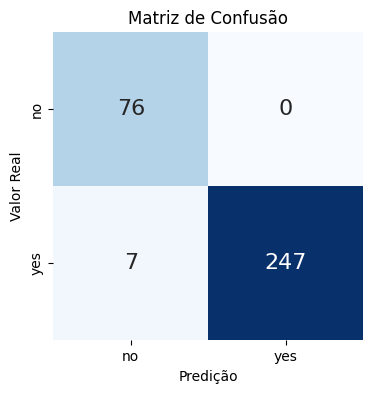

In [ ]:
cm = confusion_matrix(y_test, y_pred)

class_names = model.classes_

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d',  cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})
plt.title('Matriz de Confusão')
plt.xlabel('Predição')
plt.ylabel('Valor Real')
plt.show()

## 2.4. Novamente, considere o modelo de maior acurácia, dentre os 5 modelos avaliados. Qual a predição de `card` nos casos de `df_case_classification`?  

In [ ]:
df_case_classification['owner'] = df_case_classification['owner'].map({'yes': 1, 'no': 0})
df_case_classification['selfemp'] = df_case_classification['selfemp'].map({'yes': 1, 'no': 0})

df_case_classification['card'] = model.predict(df_case_classification.drop(['client_name'],axis=1))
display(df_case_classification[['client_name','card']])

,client_name,card
0,Joseph Reid,yes
1,Lindsey Gonzales,yes
